# MESA session 2: solution notebook


In [14]:
import numpy as np
import mesa_reader as mr
import matplotlib.pyplot as plt 
import astropy.units as u
import astropy.constants as const

# 3. Overshooting in an intermediate-mass star

In [15]:
# Open the history data for each of the runs
f0_hist_data = mr.MesaData('data/M8_no_overshoot/LOGS/history.data')
f025_hist_data = mr.MesaData('data/M8_overshoot0p25/LOGS/history.data')
f05_hist_data = mr.MesaData('data/M8_overshoot0p5/LOGS/history.data')

print(f0_hist_data.bulk_names)

('model_number', 'num_zones', 'star_age', 'log_dt', 'star_mass', 'log_xmstar', 'log_abs_mdot', 'mass_conv_core', 'conv_mx1_top', 'conv_mx1_bot', 'conv_mx2_top', 'conv_mx2_bot', 'mx1_top', 'mx1_bot', 'mx2_top', 'mx2_bot', 'mix_type_1', 'mix_qtop_1', 'mix_type_2', 'mix_qtop_2', 'mix_type_3', 'mix_qtop_3', 'mix_type_4', 'mix_qtop_4', 'mix_type_5', 'mix_qtop_5', 'mix_type_6', 'mix_qtop_6', 'mix_type_7', 'mix_qtop_7', 'mix_type_8', 'mix_qtop_8', 'mix_type_9', 'mix_qtop_9', 'mix_type_10', 'mix_qtop_10', 'log_LH', 'log_LHe', 'log_LZ', 'log_Lnuc', 'pp', 'cno', 'tri_alfa', 'epsnuc_M_1', 'epsnuc_M_2', 'epsnuc_M_3', 'epsnuc_M_4', 'epsnuc_M_5', 'epsnuc_M_6', 'epsnuc_M_7', 'epsnuc_M_8', 'burn_type_1', 'burn_qtop_1', 'burn_type_2', 'burn_qtop_2', 'burn_type_3', 'burn_qtop_3', 'burn_type_4', 'burn_qtop_4', 'burn_type_5', 'burn_qtop_5', 'burn_type_6', 'burn_qtop_6', 'burn_type_7', 'burn_qtop_7', 'burn_type_8', 'burn_qtop_8', 'burn_type_9', 'burn_qtop_9', 'burn_type_10', 'burn_qtop_10', 'he_core_mass',

In [16]:
def plot_HR_with_radius_contours(list_of_hist_data, label_list = ['No overshoot', 'Overshoot 0.25', 'Overshoot 0.5'],
                                 save_path='plots/HR_diagram_overshoot.png',
                                 xlim=(4.5, 3.5), ylim=(3, 4.5)):
    """Plot an HR diagram with constant radius contours and MESA track overlays.
    
    Parameters:
       list_of_hist_data =  [f0_hist_data, f025_hist_data, f05_hist_data] : MesaData]
       save_path : str Where to save the output plot.
       xlim :x-axis (log Teff) limits. Default: (4.5, 3.5) for HR diagram.
       ylim : y-axis (log L) limits. Default: (3, 4.5)
    """
    
    def Radius(Teff, L):
        Teff = Teff * u.K
        L = (L * u.Lsun).to(u.W)
        R = (L / (4 * np.pi * const.sigma_sb * Teff**4))**0.5
        return R.to(u.Rsun).value

    fig, ax = plt.subplots(figsize=(8, 8))

    # --- Radius contour grid ---
    Teffs = np.linspace(1.5, 8, 100)
    Ls = np.linspace(2.0, 6.0, 100)
    Teffs_grid, Ls_grid = np.meshgrid(Teffs, Ls)
    Radius_grid = Radius(10**Teffs_grid, 10**Ls_grid)

    CS = ax.contour(Teffs_grid, Ls_grid, Radius_grid,
                    levels=[1, 10, 100, 1e3, 1e4],
                    colors='#969696', linestyles='dashed')
    ax.clabel(CS, inline=1, inline_spacing=-5, fontsize=15,
              manual=[(4.5, 3.2), (3.9, 3.2), (3.5, 3.2), (2.5, 3.2), (1.5, 3.1)])

    # --- MESA tracks ---
    for histdata, label, color in zip(
        list_of_hist_data,
        label_list,
        ['royalblue', 'green', 'crimson']
    ):
        ax.plot(histdata.log_Teff, histdata.log_L, label=label, color=color)

    # --- Axis setup ---
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    ax.set_xlabel(r'$\log T_{\mathrm{eff}}$', fontsize=20)
    ax.set_ylabel(r'$\log L/L_{\odot}$', fontsize=20)
    ax.legend(fontsize=15)

    plt.tight_layout()
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()



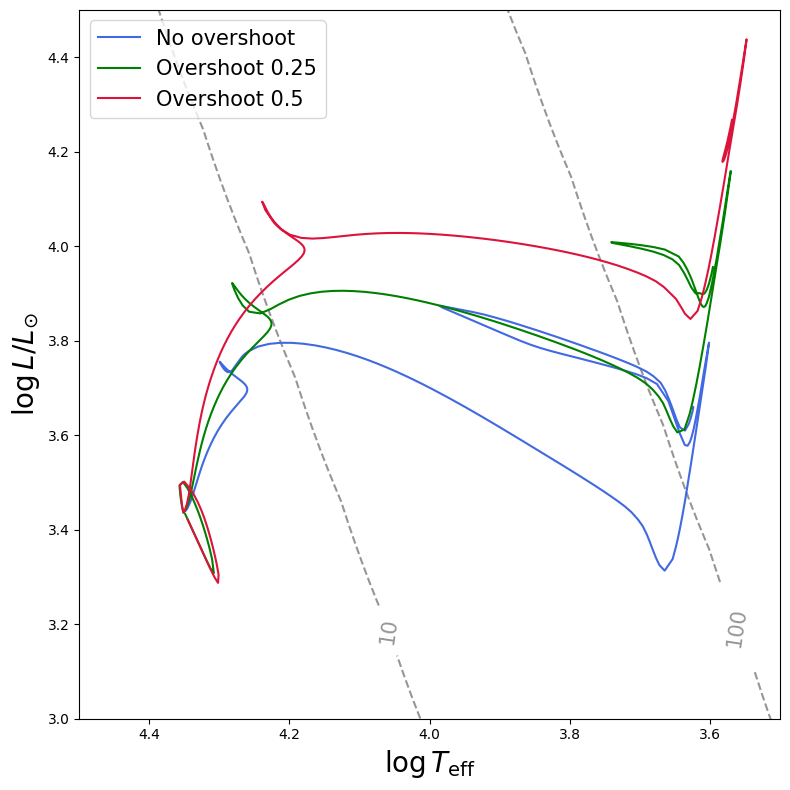

In [17]:
plot_HR_with_radius_contours(list_of_hist_data = [f0_hist_data, f025_hist_data, f05_hist_data] )

3.2 a) We see that higher overshoot leads to brighter stars, because the core is effectively larger and has more fuel to burn. This also makes the main-sequence lifetime longer. 

The star increases in luminosity and radius during the main sequence, because of the larger region
inside which $\mu$ increases which enhances the effects on L and R ($L\propto \mu^4M^3$).

After the main sequence, the core mass is larger which in turn leads to larger luminosities during all evolution phases after the main sequence and, as a result shorter lifetimes of these post-main sequence phases.

# $\rho_c - T_c$ diagram

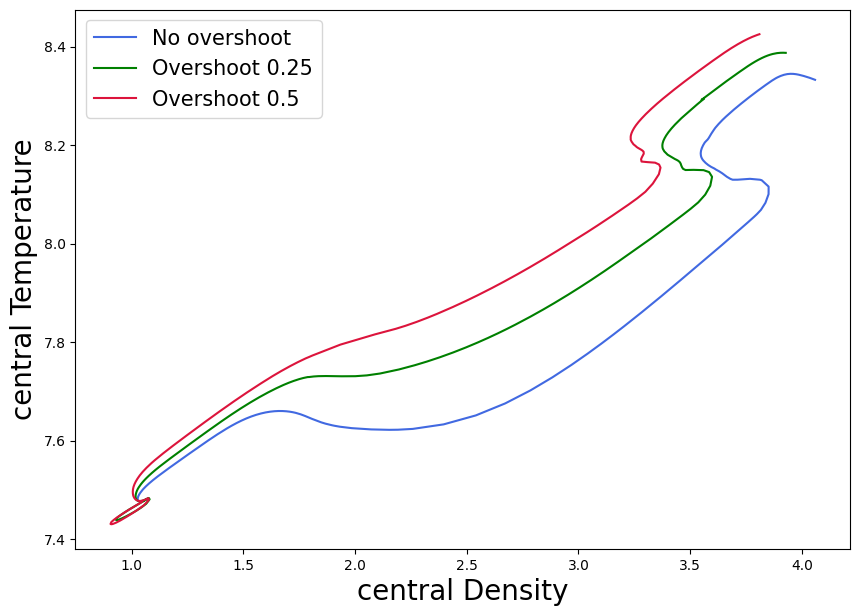

In [18]:
fig, ax = plt.subplots(figsize = (10,7))

##########
# Select the data to plot
for histdata, label, colors in zip([f0_hist_data, f025_hist_data, f05_hist_data],
                                 ['No overshoot', 'Overshoot 0.25', 'Overshoot 0.5'],
                                 ['royalblue', 'green', 'crimson']):
    plt.plot(histdata.log_center_Rho, histdata.log_center_T, label = label, color = colors)

# 'log_center_T', 'log_center_Rho',
plt.legend(fontsize = 15)
plt.xlabel("central Density", fontsize = 20 )
plt.ylabel("central Temperature", fontsize = 20 )
plt.savefig('plots/rho_T_diagram_overshoot.png', bbox_inches = 'tight')
plt.show()

b) We note that while the effective temperature of the star is slightly lower with higher overshoot, the central temperature increases at a fixed value for the central density. 
This can be understood from the homology relations for main sequence stars $T_c \propto \mu^{1/3}M^{0.19}$ and the larger region (core) with higher $\mu$ (see chapter 7)

# Central helium aundance 

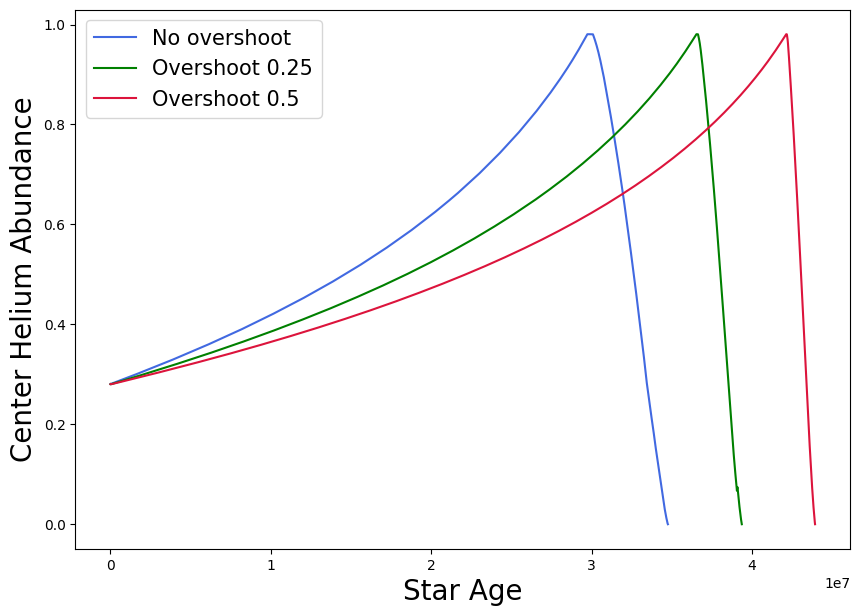

In [19]:

fig, ax = plt.subplots(figsize = (10,7))

##########
# Select the data to plot
for histdata, label, colors in zip([f0_hist_data, f025_hist_data, f05_hist_data],
                                 ['No overshoot', 'Overshoot 0.25', 'Overshoot 0.5'],
                                 ['royalblue', 'green', 'crimson']):
    plt.plot(histdata.star_age, histdata.center_he4, label = label, color = colors)

# 'log_center_T', 'log_center_Rho',
plt.legend(fontsize = 15)
plt.xlabel("Star Age", fontsize = 20 )
plt.ylabel("Center Helium Abundance", fontsize = 20 )
plt.savefig('plots/central_He.png', bbox_inches = 'tight')
plt.show()

c) As mentioned above, we see that the stars with high overshoot live longer: because the core is effectively larger and has more fuel to burn, the main-sequence lifetime is longer. 
Post MS, the stars keep larger luminosities during all evolution phases and as a result shorter lifetimes of these post-main sequence phases.

### How do the MS and He burning lifetimes change with overshooting? 

In [20]:
############################
def get_lifetime(hist_data):
# Main sequece mask
    ms_mask = hist_data.center_h1 > 1e-4
    # Select the last age where the star is still on the main sequence
    ms_lifetime = hist_data.star_age[ms_mask][-1]
    return ms_lifetime

ms_lifetime_no_overshoot = get_lifetime(f0_hist_data)
ms_lifetime_overshoot_025 = get_lifetime(f025_hist_data)
ms_lifetime_overshoot_05 = get_lifetime(f05_hist_data)

print(f"Main sequence lifetime for no overshoot: {ms_lifetime_no_overshoot*1e-6} Myr")
print("fractional increase of MS lifetime $t_{MS, 0.25}/t_{MS, 0}$", ms_lifetime_overshoot_025/ms_lifetime_no_overshoot)
print("fractional increase of MS lifetime $t_{MS, 0.5}/t_{MS, 0}$", ms_lifetime_overshoot_05/ms_lifetime_no_overshoot)

#

Main sequence lifetime for no overshoot: 29.721111916853726 Myr
fractional increase of MS lifetime $t_{MS, 0.25}/t_{MS, 0}$ 1.2285560566684732
fractional increase of MS lifetime $t_{MS, 0.5}/t_{MS, 0}$ 1.4168528882076603


In [21]:
###########################
# Helium burning time
def get_he_burning_time(hist_data):
    verbose = False
    # Select the first age where central helium abundance drops below primordial 
    # assuming X = 0.7 and Z = 0.02
    he_burn_start_mask = hist_data.center_he4 < 0.28
    he_burn_start = hist_data.star_age[he_burn_start_mask][0] 
    if verbose:
        print(f"He burning starts at {he_burn_start*1e-6} Myr")
    # Select the last age where the star is still burning helium in the core
    he_core_exhaust_mask = hist_data.center_he4 < 1e-4
    he_burn_end = hist_data.star_age[he_core_exhaust_mask][-1] 
    if verbose:
        print(f"He burning ends at {he_burn_end*1e-6} Myr")
    he_burn_time = he_burn_end - he_burn_start
    if verbose:
        print(f"He burning lifetime for no overshoot: {he_burn_time*1e-6} Myr")
    return he_burn_time

he_burn_time_no_overshoot = get_he_burning_time(f0_hist_data)
he_burn_time_overshoot_025 = get_he_burning_time(f025_hist_data)
he_burn_time_overshoot_05 = get_he_burning_time(f05_hist_data)

print(f"He core burning lifetime for no overshoot: {he_burn_time_no_overshoot*1e-6} Myr")
print("fractional increase of He burning lifetime $t_{He, 0.25}/t_{He, 0}$", he_burn_time_overshoot_025/he_burn_time_no_overshoot)
print("fractional increase of He burning lifetime $t_{He, 0.5}/t_{He, 0}$", he_burn_time_overshoot_05/he_burn_time_no_overshoot)



He core burning lifetime for no overshoot: 1.2744605538565703 Myr
fractional increase of He burning lifetime $t_{He, 0.25}/t_{He, 0}$ 0.6223084478442469
fractional increase of He burning lifetime $t_{He, 0.5}/t_{He, 0}$ 0.3962901744580356


d) We see above that although the main sequence lifetime increases, the He burning time decreases! 

This matches with our explanation above :). 
Larger fuel supply = longer main sequence, but because the star is brighter at the onset of core He burning, meaning that the star will burn through its fuel faster!


# 4. Make your own Kippenhahn diagram

In [22]:
import sys
import os
sys.path.append(os.path.expanduser("~/Programs/mkipp"))

import mkipp
import kipp_data
import mesa_data

data/session2_work/LOGS ['data/session2_work/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


Kipp_Plot(contour_plot=<matplotlib.contour.QuadContourSet object at 0x155513cf2020>, histories=[<mesa_data.mesa_data object at 0x155518b1f0a0>], xlims=(1.0, 1279.0))

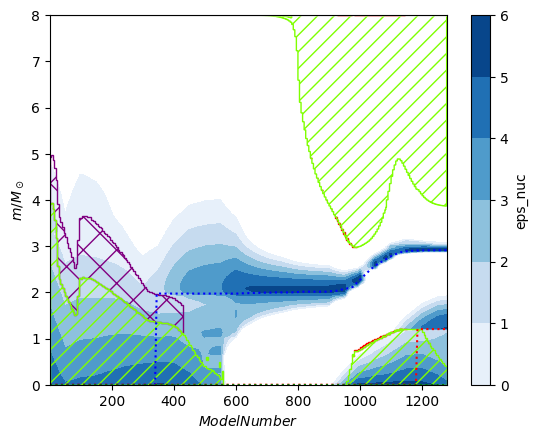

In [23]:
mkipp.kipp_plot(mkipp.Kipp_Args(logs_dirs = ['data/session2_work/LOGS'], save_filename = "plots/Kippenhahn.png",))



We see the mass coordinate of our star as a function of Model number, this is similar to time, except that we know there are more models whenever the star is more difficult to resolve. 
In blue, we see the see the nuclear energy production from nuclear reactions (reaction neutrinos subtracted) in ergs/g/sec. This shows us where the star is burning, i.e. in the core during the MS, followed by H-shell burning, and core He burning.

We can find inside mkipp.py that "Chartreuse" hatching shows Convective mixing regions, and purple hatching shows overshooting (Semiconvective mixing)

The blue dotted line shows the helium core mass and the red dotted line shows the carbon core


data/session2_work/LOGS ['data/session2_work/LOGS']
Reading profile data
Reading history data
Constructing mixing regions
there are 10 mixing zones


Kipp_Plot(contour_plot=<matplotlib.contour.QuadContourSet object at 0x155513a42d40>, histories=[<mesa_data.mesa_data object at 0x155518babcd0>], xlims=(0.0005524271728019905, 43.921702743936))

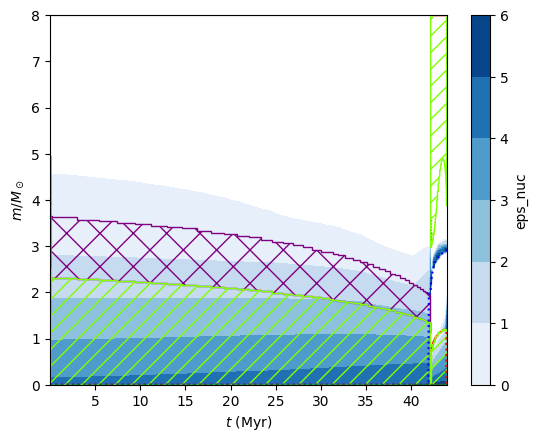

In [24]:
mkipp.kipp_plot( mkipp.Kipp_Args(logs_dirs = ['data/session2_work/LOGS'], xaxis = 'star_age', 
                 save_filename = "plots/Kippenhahn2.png",))

We created a simple variation by switching to the stellar age on the x-axis: it is clear that although the model number is less physical, it is a better value to show on the x-axis since it naturally places an emphasis on interesting regions